# Project Titanic- Machine Learning form Disaster

<h2>Table of Contents</h2>
    <ul>
        <li><a href="#introduction">1. Introduction</a></li>
        <li><a href="#loading-data">2. Loading the Data</a></li>
        <li><a href="#eda">3. Exploratory Data Analysis</a></li>
        <li><a href="#fe-dw">4. Feature Engineering & Data Wrangling</a></li>
        <li><a href="#model-training">5. Model Training</a></li>
    </ul>

  <h2 id="introduction">1. Introduction</h2>
    <p>The sinking of the Titanic is one of the most infamous shipwrecks in history.</p>
    <p>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.</p>
    <p>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.</p>
    <p>In this challenge, we ask you to build a predictive model that answers the question: “What sorts of people were more likely to survive?” using passenger data (i.e., name, age, gender, socio-economic class, etc.).</p>

  <h2 id="loading-data">2. Loading the Data</h2>
  <p>To begin, we first load the Titanic dataset and perform some initial exploration to understand its structure and content.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Node:
 * SibSp:  of siblings/spouses abroad the Titanic
 * Parch:  of parents/children abroad the Titanic
 * Ticket: Ticket number
 * Cabin: Cabin number

In [5]:
#review data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId:
  *  The first column in the passenger ID.The ID for a passenger is just a number to identify this passenger in this dataset.So this column is not really a part of the infomation we should care about.We can't drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of set_index method.

In [6]:
train_df.set_index(train_df.PassengerId,inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.drop('PassengerId',axis=1,inplace=True)

In [8]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
test_df = pd.read_csv('./titanic/test.csv',index_col='PassengerId')
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### 2.1. Feature Classification Categories vs Numerical: 
* This helps us select the appropriate plots for visualation
#### Which feature are categorical?
   * Categorical Features: `nominal`,`ordinal`,`ratio`,`interval`
   * To classify the samples into sets of similar samples
#### Which features are numerical?
   * Numerical features: `discrete`,`continuous`,`timeseries`
   * These values change from sample to sample

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: `Suvived`,`Sex`,`Embarked`,`Pclass`,`SibSp`,`Parch`
* Numerical: `Age`,`Fare`
* Mix type of data: `Ticket`,`Cabin`
* Contain Error/Typo: `Name`
* Blank or Null: `Cabin`>`Age`>`Embarked`
* Various Data Type: String,Int,Float

According to the data dictionary,we know that if a passenger is marked as 1,he or she survived.Clearly the number 1 or 0 is a flag for the person's for survivorship.Yet the data type is int64,which is a numerical type.We can change that with the following command.

In [12]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [13]:
train_df["Survived"].dtype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [14]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df,features)
convert_cat(test_df,features)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


### 2.2. Distribution of Numerical feature values across the samples

In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200



<h3 id="distribution-of-categorical-features">2.3. Distribution of Categorical features</h3>


In [18]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


<h2 id="eda">3. Exploratory Data Analysis</h2>


<h3 id="correlating-categorical-features">3.1. Correlating categorical features</h3>

   - Categorical: `Survived`,`Sex`,`Embarked`,`Pclass(ordinal)`,`Sibsp`,`Parch`
### Target Variable: `Survived`

In [19]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [20]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


 Only 38% survived the disaster.So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques the sampling to tackle the imbalance
 # Sex

In [21]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

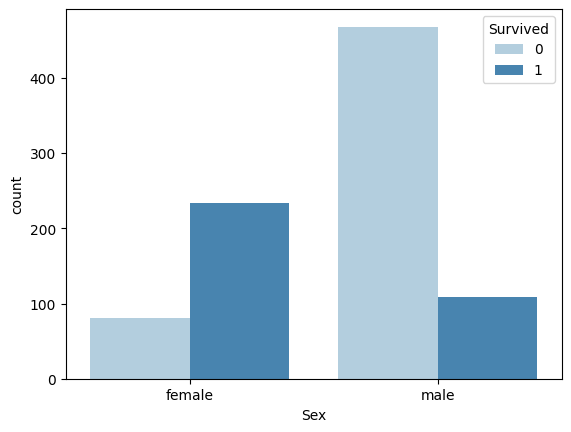

In [22]:
sns.countplot(data=train_df,x='Sex',hue='Survived',palette='Blues')

- Remaining Categorical Feature Columns

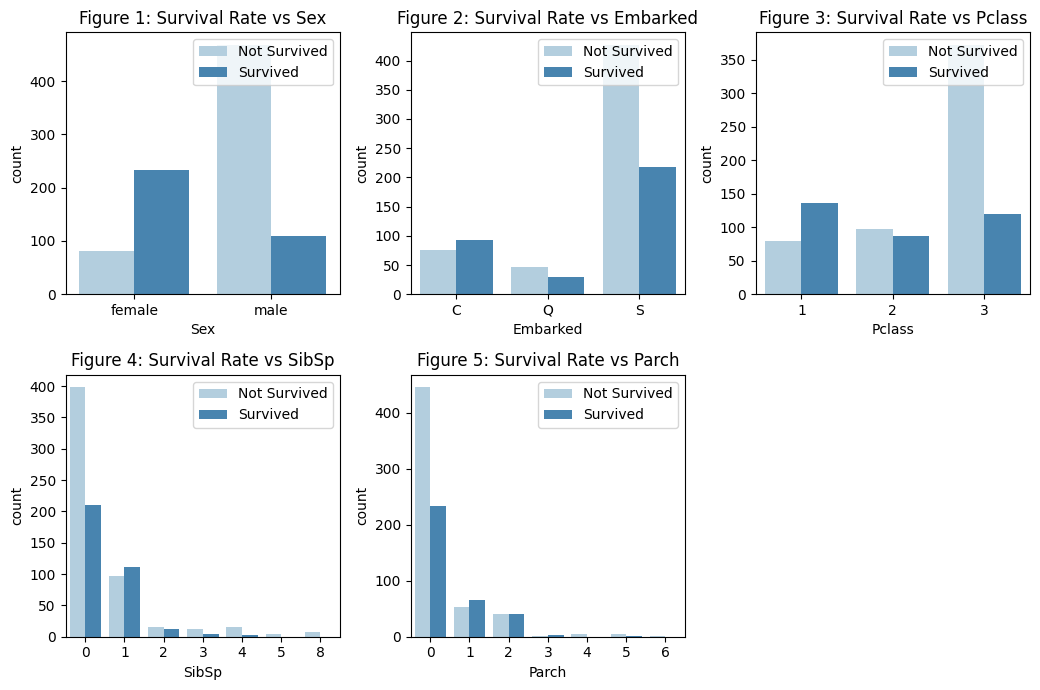

In [23]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']

n_row = 2
n_col = 3

fig,ax = plt.subplots(n_row,n_col,figsize=(n_col*3.5,n_row*3.5))

for r in range(0,n_row):
    for c in range(0,n_col):
        i = r*n_col+c
        if i < len(cols):
            ax_i = ax[r][c]
            sns.countplot(data=train_df,x=cols[i],hue='Survived',palette='Blues',ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='',loc='upper right',labels=['Not Survived','Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Observation:
*  **Survival Plate**:
     * Fig 1: Female survival rate > male
     * Fig 2: Most people embarked on Southampton, and also the highest people not survived
     * Fig 3: 1st class highest survival rate
     * Fig 4: People going with 0 'SibSp' are mostly not survived,the numer of passenger with 1-2 family members has a better chance of survival
     * Fig 5: People going to 0 'Parch' are mostly not survived
     

<h3 id="EDA-for-Numerical-Features">3.2. EDA for Numerical Features</h3>

- Numerical Features:(continuous) `Age`,`Fare`

## Age


<Axes: xlabel='Age', ylabel='Count'>

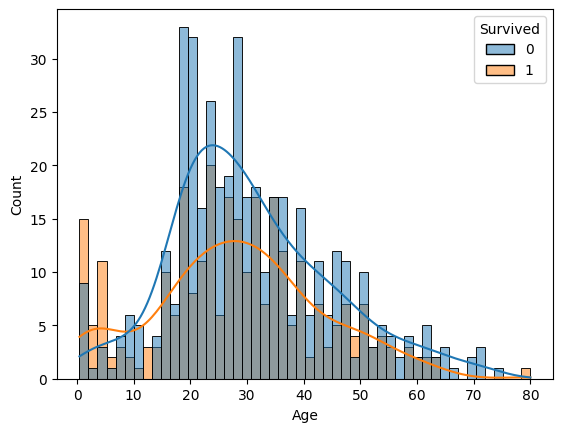

In [24]:
sns.histplot(data=train_df,x='Age',hue='Survived',bins=50,kde=True)

  - Mostly passenger were from 18-40 ages
  - Children had more chances to survive than other ages

## Fare

In [25]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

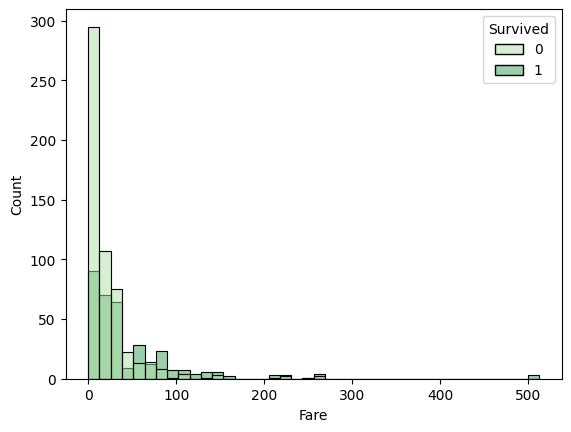

In [26]:
sns.histplot(data=train_df,x='Fare',hue='Survived',bins=40,palette='Greens')

<Axes: xlabel='Fare', ylabel='count'>

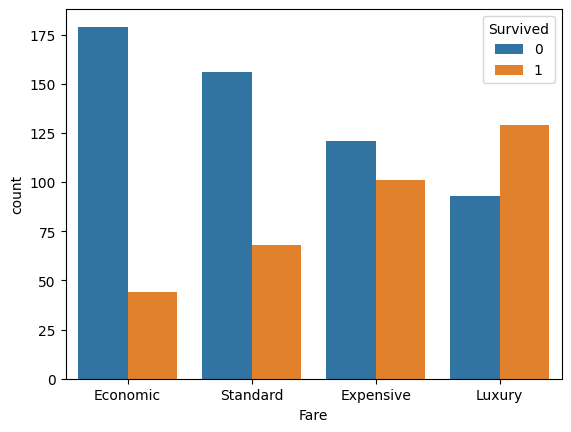

In [27]:
fare_cate = ['Economic','Standard','Expensive','Luxury']
quartile = pd.qcut(train_df['Fare'],4,labels=fare_cate)
sns.countplot(x=quartile,hue=train_df['Survived'])

In [28]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

* **Distribution of Fare**
  * Fare does not follow a normal distribution and has a huge spoke at the price range '(0-1000)'
  * The distribution is showed to the left with 75% of the fare paid under $31 and a max paid fare of $512
* **Quartile plot**
  * Passenger with Luxury & Expensive Fare will have more chance to survive
<h2 id="fe-dw">4. Feature Engineering & Data Wrangling</h2>

<h3 id="Feature Engineering">4.1. Feature Engineering</h3>

<h4> Name <h4>
 - Regular Expression

In [29]:
train_df['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [30]:
import re
def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(lambda name:extract_title(name))

In [31]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [32]:
test_df['Title'] = test_df['Name'].apply(lambda name:extract_title(name))

In [33]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [34]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [35]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

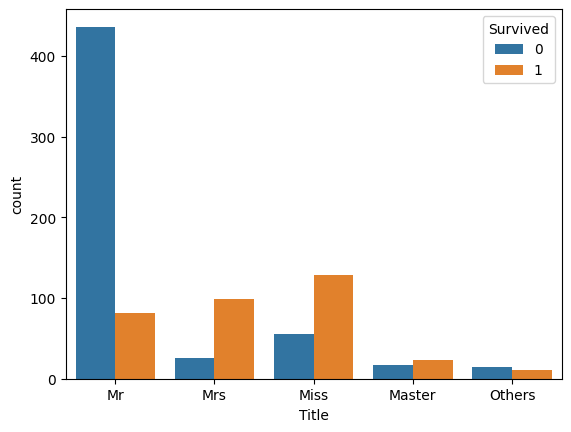

In [36]:
sns.countplot(data=train_df,x='Title',hue='Survived')

### Family
 - `SibSp`,`Parch`

In [37]:
train_df['Family_Size'] = train_df['SibSp'].astype('int')+train_df['Parch'].astype('int')+1
test_df['Family_Size'] = test_df['SibSp'].astype('int')+test_df['Parch'].astype('int')+1

In [38]:
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'],bins=[0,1,4,6,11],labels=['Solo','Small','Medium','Large'])
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'],bins=[0,1,4,6,11],labels=['Solo','Small','Medium','Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

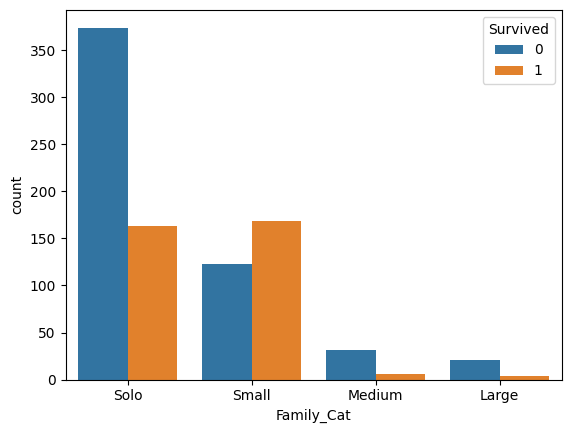

In [39]:
sns.countplot(data=train_df,x='Family_Cat',hue='Survived')

<h3 id="data-wrangling">4.2. Data Wrangling</h3>

In [40]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
feature_cols = num_features+cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [41]:
def display_missing(df,feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print(f' {col} has {missing_count*100/n_rows:.2f}% missing values.')
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

 Age has 19.87% missing values.
 Embarked has 0.22% missing values.
 Age has 20.57% missing values.
 Fare has 0.24% missing values.


### Filling missing values

#### Age
   - Filling missing values with 'median' of whole dataset

In [42]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median('Age')
age_by_sex_pclass

C:\Users\dell\AppData\Local\Temp\ipykernel_15000\499696002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median('Age')


Age      Fare  Family_Size
Sex    Pclass                             
female 1       35.0  82.66455          2.0
       2       28.0  22.00000          2.0
       3       21.5  12.47500          2.0
male   1       40.0  41.26250          1.0
       2       30.0  13.00000          1.0
       3       25.0   7.92500          1.0

In [43]:
train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\dell\AppData\Local\Temp\ipykernel_15000\1026649559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


Sex     Pclass  PassengerId
female  1       2              38.0
                4              35.0
                12             58.0
                32             35.0
                53             49.0
                               ... 
male    3       878            19.0
                879            25.0
                882            33.0
                885            25.0
                891            32.0
Name: Age, Length: 891, dtype: float64

In [44]:
test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\dell\AppData\Local\Temp\ipykernel_15000\439652698.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


Sex     Pclass  PassengerId
female  1       904            23.0
                906            47.0
                914            41.0
                916            48.0
                918            22.0
                               ... 
male    3       1291           31.0
                1305           24.0
                1307           38.5
                1308           24.0
                1309           24.0
Name: Age, Length: 418, dtype: float64

In [45]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

 Age has 19.87% missing values.
 Embarked has 0.22% missing values.
 Age has 20.57% missing values.
 Fare has 0.24% missing values.


In [46]:
X = train_df[feature_cols]
y = train_df['Survived']
X_test = test_df[feature_cols]

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [48]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [49]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [50]:
X = preprocessor.transform(X)

In [51]:
X_test = preprocessor.transform(X_test)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<h2 id="model-training">5. Model Training</h2>

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [55]:
X_train.shape , X_val.shape

((712, 19), (179, 19))

In [56]:
X_test.shape

(179, 19)

In [57]:
# Binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,classification_report,confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

In [58]:
log_reg = LogisticRegression(solver='liblinear',max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [59]:
log_reg.score(X_val,y_val)

0.8268156424581006

In [60]:
y_pred = log_reg.predict(X_val)

In [61]:
precision_score(y_val,y_pred) , recall_score(y_val,y_pred)

(0.7424242424242424, 0.7777777777777778)

In [62]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       116
           1       0.74      0.78      0.76        63

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



 - y = a*x1+ b*x2 + bias  --> y = a*x1^2 + b*x2^2 + c*x1*x2 + bias

In [63]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_feature_X_val = poly.transform(X_val)

In [64]:
poly_log_reg = LogisticRegression(solver='liblinear',max_iter=1000)
poly_log_reg.fit(poly_features_X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [65]:
poly_log_reg.score(poly_feature_X_val,y_val)

0.7988826815642458

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
decision_tree.score(X_val,y_val)

0.7597765363128491

<h3 id="cross-validation">5.1. Cross-validation</h3>

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
log_reg_cv = LogisticRegression(solver='liblinear',max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=2022)
lr_scores = cross_val_score(log_reg_cv,X,y,scoring='accuracy',cv=5)

In [70]:
lr_scores

array([0.83240223, 0.82022472, 0.80337079, 0.80337079, 0.85955056])

In [71]:
lr_scores.mean()

0.8237838177138912

In [72]:
lr_scores.std()

0.020974212551877137

In [73]:
dt_scores = cross_val_score(dt_cv,X,y,scoring='accuracy',cv=5)

In [74]:
dt_scores

array([0.77653631, 0.79213483, 0.8258427 , 0.78651685, 0.8258427 ])

In [75]:
dt_scores.mean()

0.8013746783001695

In [76]:
dt_scores.std()

0.020593406492049864


<h3 id="baseline-model-comparison">5.2. Baseline Model Comparison</h3>

In [77]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(max_iter=120000,random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski',p=2),
    LogisticRegression(solver='liblinear',max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=seed)
]


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\d

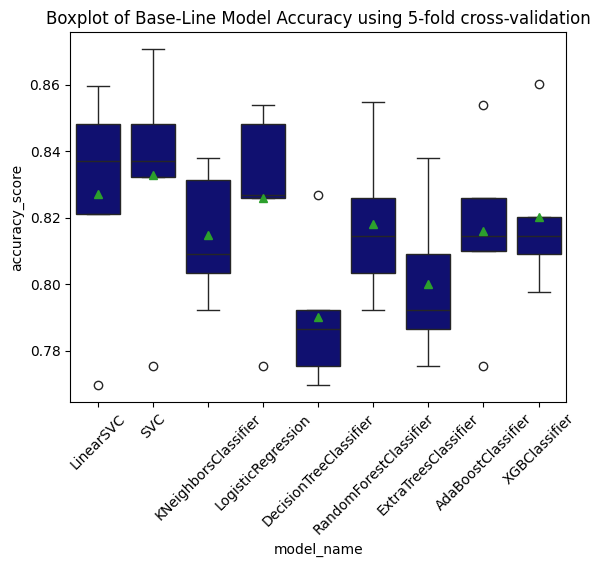

,Mean,Standard Deviation
model_name,,
SVC,0.832773,0.035393
LinearSVC,0.827167,0.035129
LogisticRegression,0.826037,0.031029
XGBClassifier,0.820382,0.023830
RandomForestClassifier,0.818141,0.024013
AdaBoostClassifier,0.815944,0.028421
KNeighborsClassifier,0.814789,0.019322
ExtraTreesClassifier,0.800182,0.024385
DecisionTreeClassifier,0.790082,0.022374


In [78]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models,X,y,metrics,cv=5,plot_results=False):
    kfold = StratifiedKFold(cv,shuffle=True,random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,X,y,scoring=metrics,cv=kfold)
        for fold_idx,score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
    cv_df = pd.DataFrame(entries,columns=['model_name','fold_id','accuracy_score'])
    if plot_results:
        sns.boxplot(x='model_name',y='accuracy_score',data=cv_df,color='navy',showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    baseline_result = pd.concat([mean,std],axis=1,ignore_index=True)
    baseline_result.columns = ['Mean','Standard Deviation']
    baseline_result.sort_values(by=['Mean'],ascending=False,inplace=True)
    return baseline_result
    return cv_df
generate_baseline_results(models,X,y,metrics='accuracy',cv=5,plot_results=True)

<h1> Thanks for watching this notebook! <h1>

## Author

<a href="https://www.linkedin.com/in/hi%E1%BA%BFu-nguy%E1%BB%85n-4444b5241">Hiếu Nguyễn</a>